#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
flights= pd.read_csv("/Users/vickichen/Desktop/flight/midterm-project/data/flights_cleaned_with_delays.csv")
flights

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-05-31,WN,WN,2081,BUR,"Burbank, CA",SFO,"San Francisco, CA",1100,1138,...,51.0,80,93.0,68.0,326,0.0,0.0,51.0,0.0,0.0
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303,...,-35.0,153,126.0,101.0,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",2130,2159,...,18.0,75,64.0,55.0,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833,...,13.0,128,142.0,102.0,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353,...,-34.0,98,70.0,51.0,228,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196188,2018-01-10,DL,EV,5584,MLI,"Moline, IL",ATL,"Atlanta, GA",1735,1726,...,-5.0,115,119.0,91.0,633,0.0,0.0,0.0,0.0,0.0
196189,2018-07-25,AA,AA,2807,TPA,"Tampa, FL",MIA,"Miami, FL",1535,1602,...,112.0,71,156.0,54.0,204,10.0,0.0,85.0,0.0,17.0
196190,2019-11-19,UA,YX,3419,EWR,"Newark, NJ",DTW,"Detroit, MI",845,836,...,-23.0,137,123.0,80.0,488,0.0,0.0,0.0,0.0,0.0
196191,2018-08-29,AS,AS,1323,SFO,"San Francisco, CA",PDX,"Portland, OR",810,807,...,20.0,101,124.0,79.0,550,0.0,0.0,20.0,0.0,0.0


### Convert data to datetime

In [13]:
flights['fl_date']=pd.to_datetime(flights['fl_date'])
flights['month'] = flights['fl_date'].dt.month

In [14]:
## mean of the monthly arrival delay time
arrival_delay_mean = flights.groupby('month') ['arr_delay'].mean()
arrival_delay_mean


month
1      3.567185
2      6.638925
3      3.214855
4      4.085592
5      6.506919
6     10.389576
7      9.480019
8      9.567611
9      1.162567
10     3.178934
11     3.539082
12     5.638948
Name: arr_delay, dtype: float64

#### Barplot Visualization

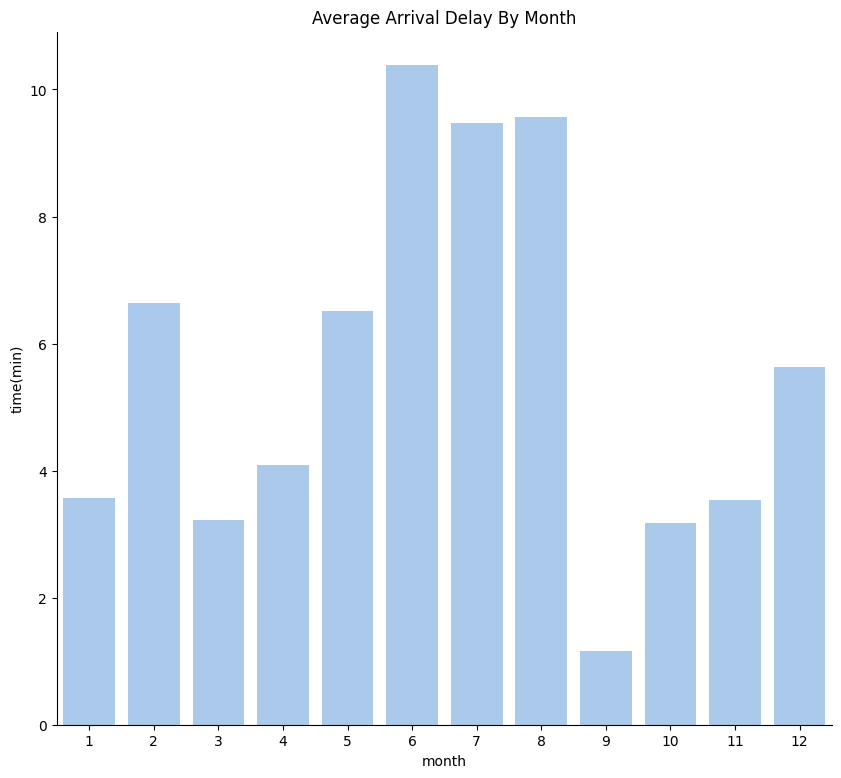

In [39]:
f, ax= plt.subplots(figsize = (10,9))
sns.set_color_codes("pastel")
ax.set(xlim=(0,100),ylabel="time(min)")
sns.barplot(x=arrival_delay_mean.index,y=arrival_delay_mean.values,color="b")
plt.title("Average Arrival Delay By Month",size=12)
sns.despine()

### From the above, we can see the summer months have the most arrival delays (June, July & Aug).
## To find out the reason, we need to take a look at all the different delay types.

In [23]:
flights.dtypes

fl_date                datetime64[ns]
mkt_unique_carrier             object
op_unique_carrier              object
op_carrier_fl_num               int64
origin                         object
origin_city_name               object
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                        int64
dep_delay                     float64
taxi_out                      float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                        int64
arr_delay                     float64
crs_elapsed_time                int64
actual_elapsed_time           float64
air_time                      float64
distance                        int64
carrier_delay                 float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
month                           int64
dtype: objec

In [32]:
other_delays = flights[['month','dep_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','arr_delay']]
other_delay_means = other_delays.groupby('month').agg('mean')
other_delay_means.reset_index(inplace=True)
other_delay_means

,month,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,1,9.572351,4.084458,0.851359,2.860141,0.011881,4.553690,3.567185
1,2,11.401940,4.209599,0.911639,3.581871,0.009699,5.531593,6.638925
2,3,8.747110,3.787841,0.487391,2.282779,0.022102,4.358491,3.214855
3,4,9.123197,3.410617,0.434112,3.175659,0.011002,4.740117,4.085592
4,5,11.140745,3.719752,0.827972,3.517150,0.009048,5.640804,6.506919
5,6,14.601477,5.041732,0.911553,3.671851,0.022817,6.975021,10.389576
6,7,14.218495,4.849286,1.140767,3.671101,0.023770,6.651148,9.480019
7,8,13.815528,4.815068,0.900006,4.231079,0.013448,6.443997,9.567611
8,9,6.483290,3.025283,0.519133,2.557336,0.024102,3.622438,1.162567
9,10,7.775520,3.592214,0.479974,2.467273,0.005494,4.171609,3.178934


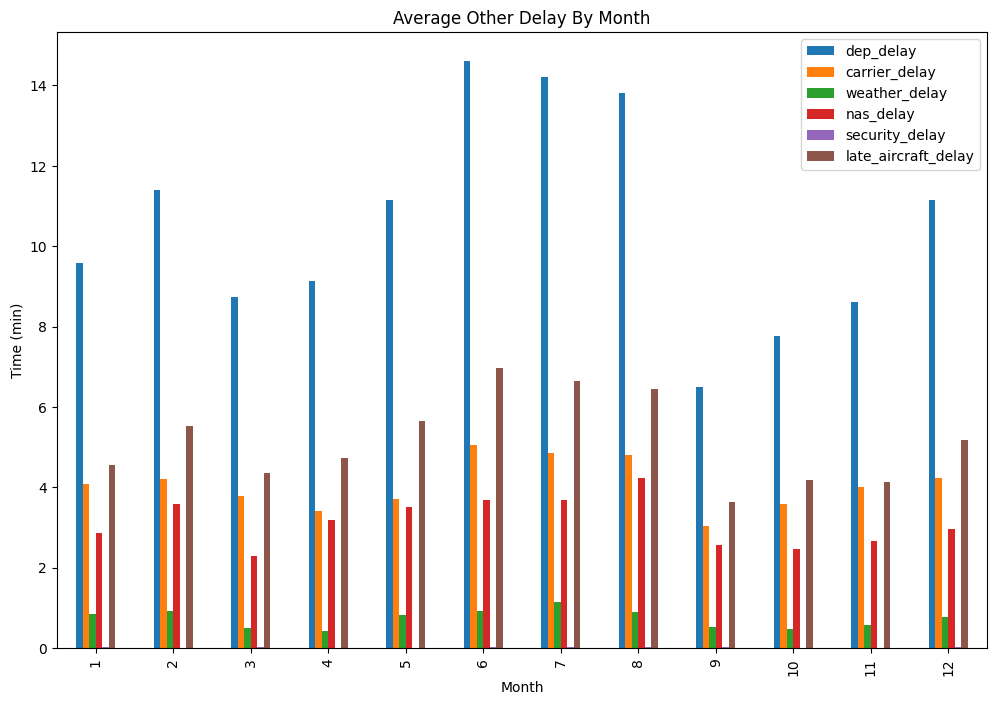

In [34]:
other_delay_means.plot(x="month", y=['dep_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'], kind="bar", figsize=(12,8));
plt.title('Average Other Delay By Month');
plt.xlabel('Month');
plt.ylabel('Time (min)');

### From above, we can see departure delays happened the most in the summer months. (June, July and August). 
### Late aircraft delays are the 2nd highest in the summer months. 
### We can conclude that increased departure delays and late aircraft delays caused increased arrival delays in the summer months.